# Supported Vector Machine

Training Set Accuracy： 0.9555555555555556
Testing Set Accuracy： 0.55


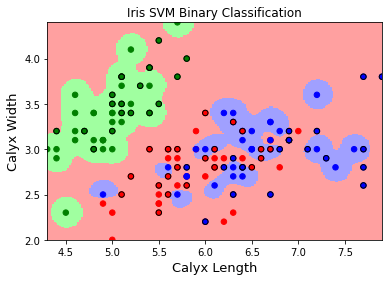

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
 
#define converts(Dictionary)
def Iris_label(s):
    it={b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2 }
    return it[s]
 
#1. Read dataset
path = 'Iris.data'
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4:Iris_label} )
 
#2. Split Training, Testing, and make label
x,y = np.split(data,indices_or_sections=(4,),axis=1)#x is data，y is label, axisis the splitting direction(1 is horizontal or 0 for vertical)，
x = x[:,0:2] #for graph convenience，only keeping the first two dimension.
train_data,test_data,train_label,test_label =sklearn.model_selection.train_test_split(x,y,
                                                                                      random_state=1,#use this to randomly split tarin and test
                                                                                      train_size=0.6,test_size=0.4)
#3. Train svm classfier
classifier = svm.SVC(C=1,kernel='rbf',gamma=100,decision_function_shape='ovr')
classifier.fit(train_data,train_label.ravel()) #ravel函数在降维时默认是行序优先
 
#4.calculate svm classfier's accuracy
print("Training Set Accuracy：",classifier.score(train_data,train_label))
print("Testing Set Accuracy：",classifier.score(test_data,test_label))

# 5. Plot Graph
# Set the range for the axises
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # First Dimension Range
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # Second Dimension Range
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # Form grid test points
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # test points
# Set color
cm_light = matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r', 'b'])
grid_hat = classifier.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
 
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=30,cmap=cm_dark)
plt.scatter(test_data[:,0],test_data[:,1], c=test_label[:,0],s=30,edgecolors='k', zorder=2,cmap=cm_dark)
plt.xlabel('Calyx Length', fontsize=13)
plt.ylabel('Calyx Width', fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('Iris SVM Binary Classification')
plt.show()

# Decision Tree
Citation: https://scikit-learn.org/stable/modules/tree.html

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

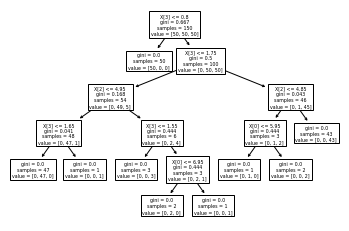

In [2]:
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz 

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [3]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

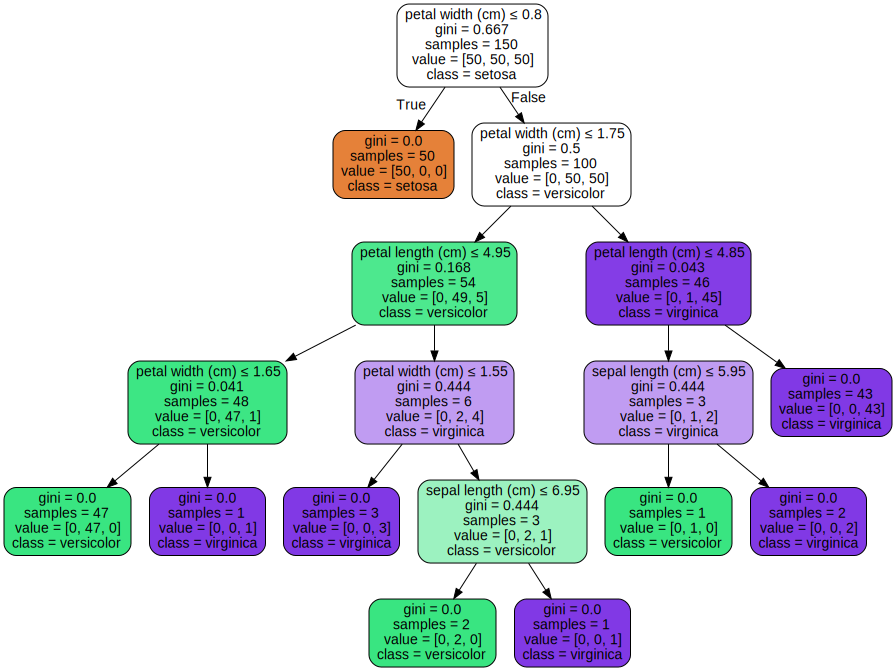

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Muti-Model Classfication Performence Comparison

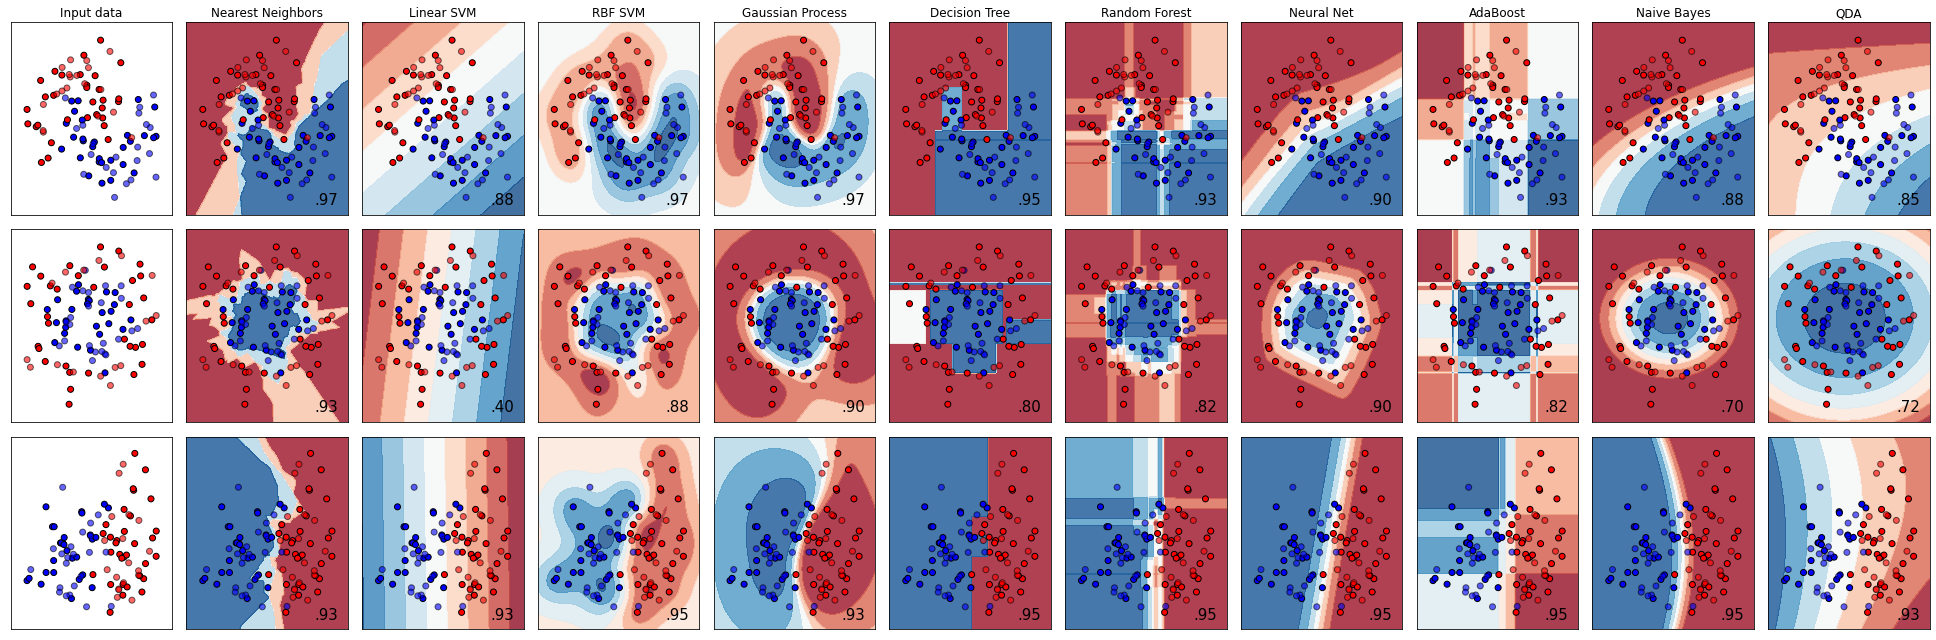

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh
names = ["Nearest Neighbors","Linear SVM","RBF SVM","Gaussian Process","Decision Tree",
    "Random Forest","Neural Net","AdaBoost","Naive Bayes","QDA",]

classifiers = [KNeighborsClassifier(3),SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1),
                GaussianProcessClassifier(1.0 * RBF(1.0)),DecisionTreeClassifier(max_depth=5),
                RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
                MLPClassifier(alpha=1, max_iter=1000),AdaBoostClassifier(),
                GaussianNB(),QuadraticDiscriminantAnalysis(),]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),make_circles(noise=0.2, factor=0.5, random_state=1),linearly_separable,]
figure = plt.figure(figsize=(16, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0],X_test[:, 1],c=y_test,cmap=cm_bright,edgecolors="k",alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - 0.3,yy.min() + 0.3,("%.2f" % score).lstrip("0"),size=15,horizontalalignment="right",)
        i += 1

plt.tight_layout()
plt.show()